In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
races = pd.read_csv(r"C:\Users\gabry\Documents\F1-Race-Analysis-with-Python\f1_race_analysis_with_python\data\races.csv")
lap_times = pd.read_csv(r"C:\Users\gabry\Documents\F1-Race-Analysis-with-Python\f1_race_analysis_with_python\data\lap_times.csv")
drivers = pd.read_csv(r"C:\Users\gabry\Documents\F1-Race-Analysis-with-Python\f1_race_analysis_with_python\data\drivers.csv")

In [3]:
race = races[races["date"] == "2021-12-12"]
race_id = race["raceId"].values[0]


In [4]:
laps = lap_times[lap_times["raceId"] == race_id]
laps = laps.merge(drivers[["driverId", "code"]], on="driverId")
laps = laps[["raceId", "driverId", "code", "lap", "position"]]

print(laps)

     raceId  driverId code  lap  position
0      1073         1  HAM    1         1
1      1073         1  HAM    2         1
2      1073         1  HAM    3         1
3      1073         1  HAM    4         1
4      1073         1  HAM    5         1
..      ...       ...  ...  ...       ...
993    1073       847  RUS   22        15
994    1073       847  RUS   23        15
995    1073       847  RUS   24        14
996    1073       847  RUS   25        16
997    1073       847  RUS   26        18

[998 rows x 5 columns]


In [5]:
drivers_code = ["HAM", "VER", "SAI"]

laps_per_driver = laps[laps["code"].isin(drivers_code)]

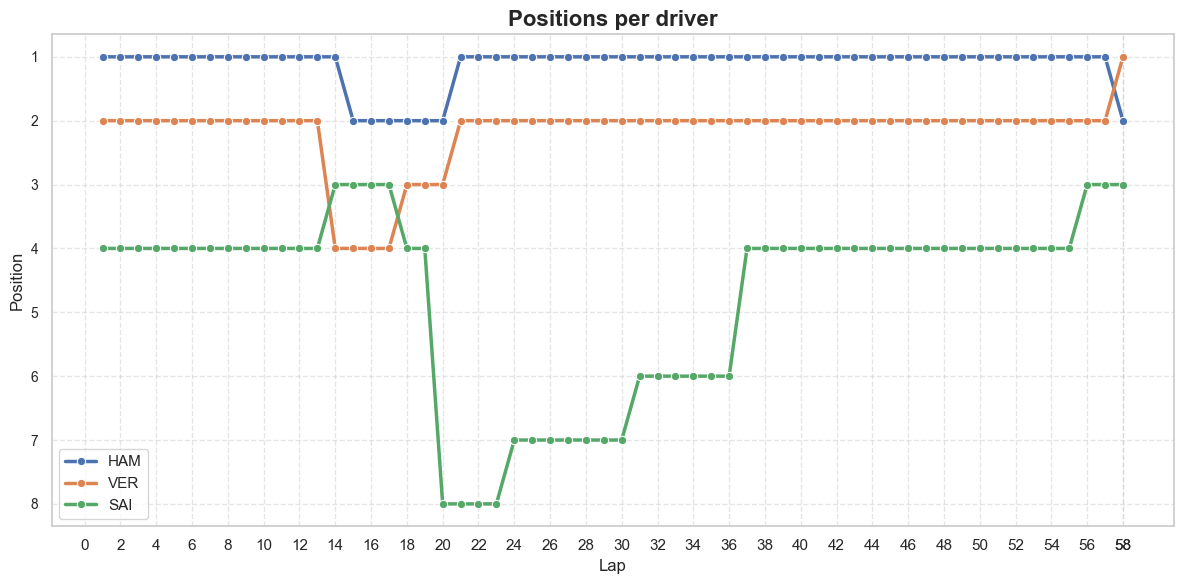

In [6]:
plt.figure(figsize=(12, 6))

sns.set_theme(style="whitegrid")

for driver in drivers_code:
    data_drive = laps_per_driver[laps_per_driver["code"] == driver]

    sns.lineplot(data=data_drive,
              x="lap", 
              y="position", 
              marker="o", 
              linewidth=2.5,
              label=driver
              )

plt.title("Positions per driver", fontsize=16, fontweight='bold')
plt.xlabel("Lap", fontsize=12)
plt.ylabel("Position",  fontsize=12)

plt.gca().invert_yaxis() 

import numpy as np

xticks = np.arange(0, 59, 2)
xticks = np.append(xticks, 58) 
plt.xticks(xticks)

plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()